In [55]:
# setting up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,auc,confusion_matrix,f1_score,precision_score,recall_score
import seaborn as sns


In [3]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
heart_disease.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

# Data Visualization

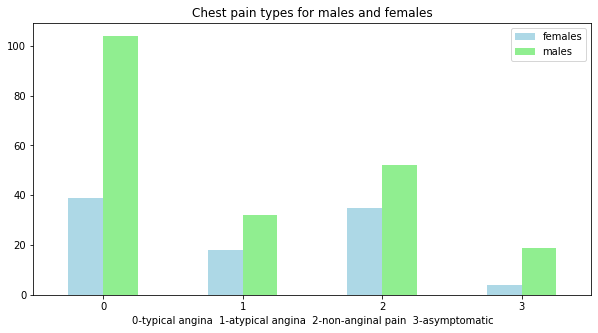

In [5]:
#chest pain types in males and females
pd.crosstab(heart_disease.cp,heart_disease.sex).plot(kind='bar',figsize=(10,5),color=['lightblue','lightgreen']);
plt.legend(['females','males']);
plt.title("Chest pain types for males and females")
plt.xlabel("0-typical angina  1-atypical angina  2-non-anginal pain  3-asymptomatic")
plt.xticks(rotation=0);

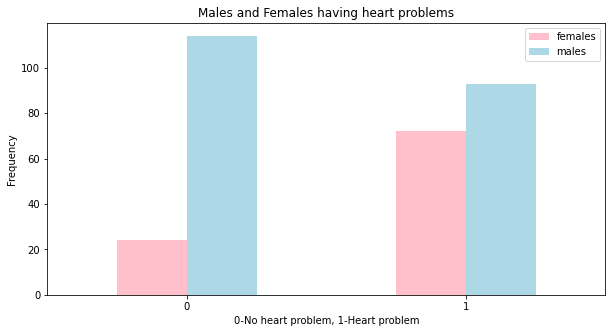

In [6]:
# pd.crosstab(heart_disease.target,heart_disease.sex)
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind='bar',figsize=(10,5),color=['pink','lightblue']);
plt.legend(['females','males']);
plt.title("Males and Females having heart problems")
plt.xlabel('0-No heart problem, 1-Heart problem')
plt.ylabel("Frequency")
plt.xticks(rotation=0);


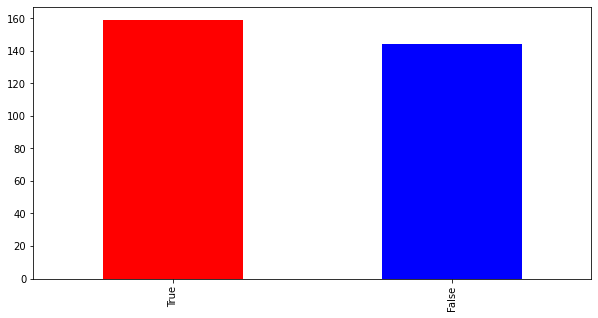

In [7]:
# mean age= 54
# people above and below the mean age
(heart_disease.age > heart_disease.age.mean()).value_counts().plot(kind='bar',color=['red','blue'],figsize=(10,5));

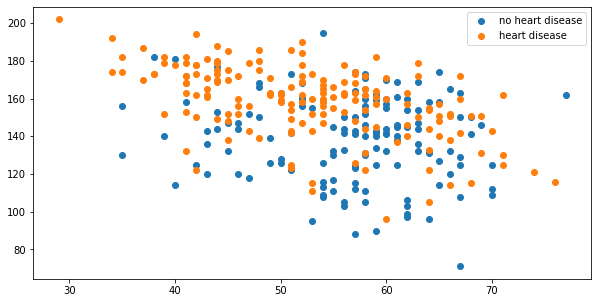

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x=heart_disease.age[heart_disease.target==0],
           y=heart_disease.thalach[heart_disease.target==0])
plt.scatter(x=heart_disease.age[heart_disease.target==1],
           y=heart_disease.thalach[heart_disease.target==1]);
plt.legend(['no heart disease','heart disease']);


In [9]:
#correlation matrix
corr_matrix=heart_disease.corr()

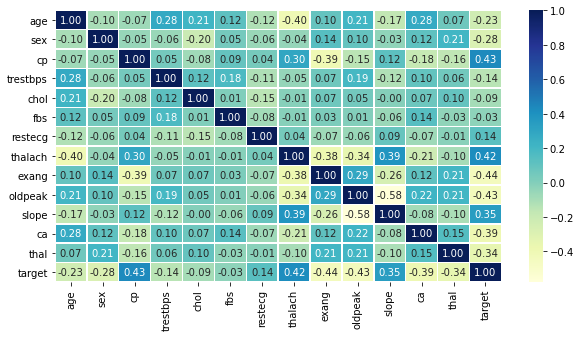

In [10]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

# model selections

In [11]:
#KNeighborsClassifier
#RandomForestClassifier
#NuSVC
#LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import NuSVC
from sklearn.linear_model import LogisticRegression
models = {
        "kneighbour" : KNeighborsClassifier(),
        "NuSVC" : NuSVC(),
        "Random_forest" : RandomForestClassifier(),
        "LogisticRegression" : LogisticRegression()
}
def train_test_model(models,x_train,y_train,x_test,y_test):
    np.random.seed(7)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores


In [12]:
x = heart_disease.drop("target",axis=1)
y = heart_disease.target

In [13]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [15]:
y


0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [15]:
model_scores = train_test_model(models=models,
                              x_train=x_train,
                              y_train=y_train,
                              x_test=x_test,
                              y_test=y_test)

/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
model_scores

{'kneighbour': 0.639344262295082,
 'NuSVC': 0.8360655737704918,
 'Random_forest': 0.8524590163934426,
 'LogisticRegression': 0.8524590163934426}

In [17]:
model_scores_show = pd.DataFrame(model_scores,index=["Accuracy"])

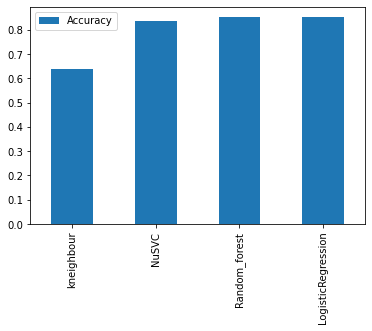

In [18]:
model_scores_show.T.plot.bar();

In [19]:
#tune Knn as it has the lowest score
train_scores=[]
test_scores=[]
knn = KNeighborsClassifier()
neighbors = range(1,100)
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    
train_scores

[1.0,
 0.8099173553719008,
 0.768595041322314,
 0.768595041322314,
 0.7644628099173554,
 0.78099173553719,
 0.7520661157024794,
 0.7231404958677686,
 0.7107438016528925,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.7107438016528925,
 0.6983471074380165,
 0.6942148760330579,
 0.6942148760330579,
 0.6900826446280992,
 0.6942148760330579,
 0.6983471074380165,
 0.7066115702479339,
 0.7066115702479339,
 0.7024793388429752,
 0.7066115702479339,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512,
 0.7272727272727273,
 0.731404958677686,
 0.731404958677686,
 0.6942148760330579,
 0.7107438016528925,
 0.6900826446280992,
 0.6900826446280992,
 0.6859504132231405,
 0.6735537190082644,
 0.6694214876033058,
 0.6735537190082644,
 0.6818181818181818,
 0.6776859504132231,
 0.6735537190082644,
 0.6776859504132231,
 0.6818181818181818,
 0.6776859504132231,
 0.6859504132231405,
 0.6735537190082644,
 0.6942148760330579,
 0.681818181818

In [20]:
test_scores

[0.5901639344262295,
 0.5737704918032787,
 0.6885245901639344,
 0.6557377049180327,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.639344262295082,
 0.6885245901639344,
 0.639344262295082,
 0.639344262295082,
 0.6557377049180327,
 0.6229508196721312,

the max test score is: 72.13%


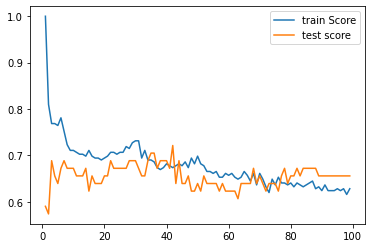

In [21]:
plt.plot(neighbors,train_scores,label="train Score")
plt.plot(neighbors,test_scores,label="test score")
plt.legend();
print(f"the max test score is: {max(test_scores)*100:.2f}%")

# there is an increase  but it is still less than the other models so we drop Knn

In [22]:
#using RandomizedSearchCV
Nu_grid ={ "kernel":['linear', 'poly', 'rbf', 'sigmoid'] ,
          "gamma" : ['scale','auto','float']
         }
Rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

log_grid={'C':np.logspace(-4,4,20),
         "solver":["liblinear"]}

In [23]:
nu_log = RandomizedSearchCV(NuSVC(),
                           param_distributions=Nu_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
# rf_ran = RandomizedSearchCV(RandomForestClassifi
nu_log.fit(x_train,y_train)

/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'float' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

RandomizedSearchCV(cv=5, estimator=NuSVC(), n_iter=20,
                   param_distributions={'gamma': ['scale', 'auto', 'float'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   verbose=True)

In [24]:
nu_log.best_params_

{'kernel': 'linear', 'gamma': 'scale'}

In [25]:
a=nu_log.score(x_test,y_test)

In [109]:
#it has actually performed worse lets check random forest and after that we will apply grid search cv

In [26]:
Rf_log = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=Rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
Rf_log.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
Rf_log.best_params_


{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [28]:
b=Rf_log.score(x_test,y_test)

In [29]:
log_grid_nuv = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=log_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
log_grid_nuv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
c=log_grid_nuv.score(x_test,y_test)

In [31]:
#post Randomised Search Cv we have
tuned_models ={'NuSVC':a,
              "RandomForestClassifier":b,
              "LogisticRegression":c} 

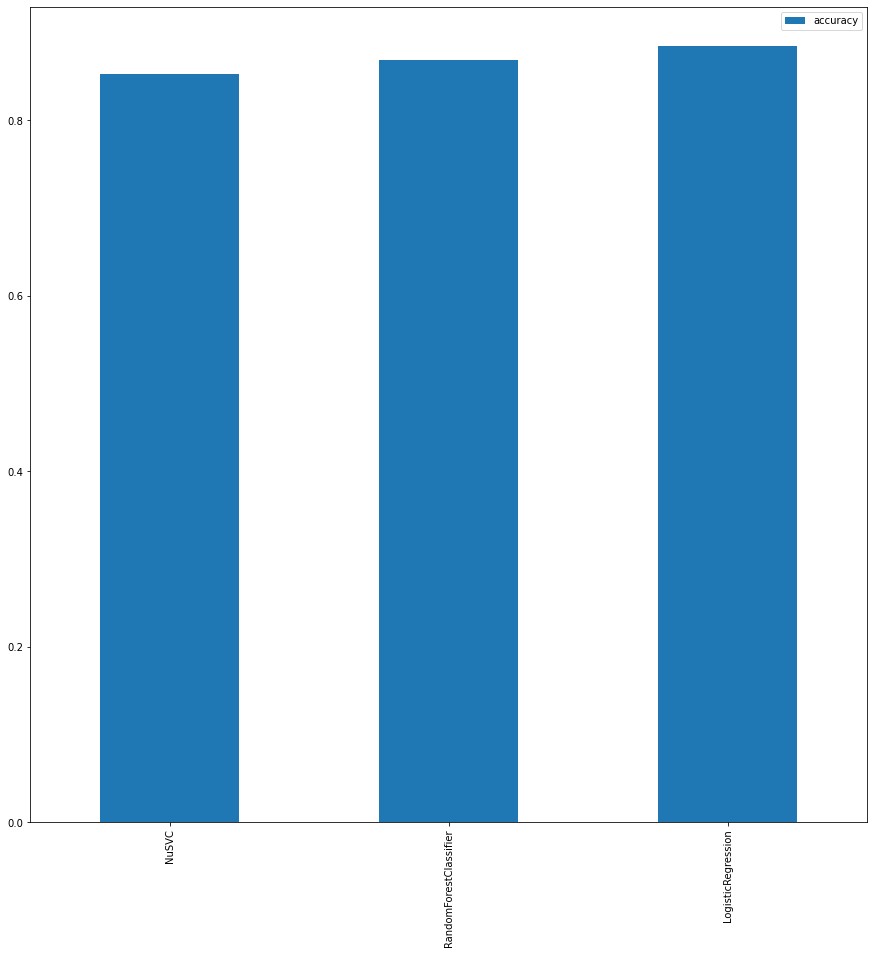

In [32]:
display_tuned_models = pd.DataFrame(tuned_models,index=["accuracy"])
display_tuned_models.T.plot.bar(figsize=(15,15));

# Grid Search CV

In [33]:
NUSVC_grid ={ "kernel":['linear', 'poly', 'rbf', 'sigmoid'] ,
          "gamma" : ['scale','auto','float']
         }
Randf_grid = {"n_estimators": np.arange(10,100,50),
          "max_depth":[5,10],
          'min_samples_split':np.arange(2,20,5),
          "min_samples_leaf":np.arange(1,20,5)}

logreg_grid={'C':np.logspace(-4,4,20),
         "solver":["liblinear"]}

In [34]:
NUSVC_grid_search = GridSearchCV(NuSVC(),
                                param_grid=NUSVC_grid,
                                cv=5,
                                verbose=True)
NUSVC_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/svm/_base.py", line 214, in fit
    raise ValueError(
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'float' instead.

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/spectre/Desktop/heart-disease-project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

GridSearchCV(cv=5, estimator=NuSVC(),
             param_grid={'gamma': ['scale', 'auto', 'float'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=True)

In [35]:
d=NUSVC_grid_search.score(x_test,y_test)

In [36]:
#the estimators had to be reduced which would have caused an effect on the output 
Randf_grid_search = GridSearchCV(RandomForestClassifier(),
                                param_grid=Randf_grid,
                                cv=5,
                                verbose=True)
Randf_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10],
                         'min_samples_leaf': array([ 1,  6, 11, 16]),
                         'min_samples_split': array([ 2,  7, 12, 17]),
                         'n_estimators': array([10, 60])},
             verbose=True)

In [37]:
e=Randf_grid_search.score(x_test,y_test)

In [38]:
logreg_grid_search = GridSearchCV(LogisticRegression(),
                                 param_grid=logreg_grid,
                                 cv=5,
                                 verbose=True)
logreg_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
f=logreg_grid_search.score(x_test,y_test)

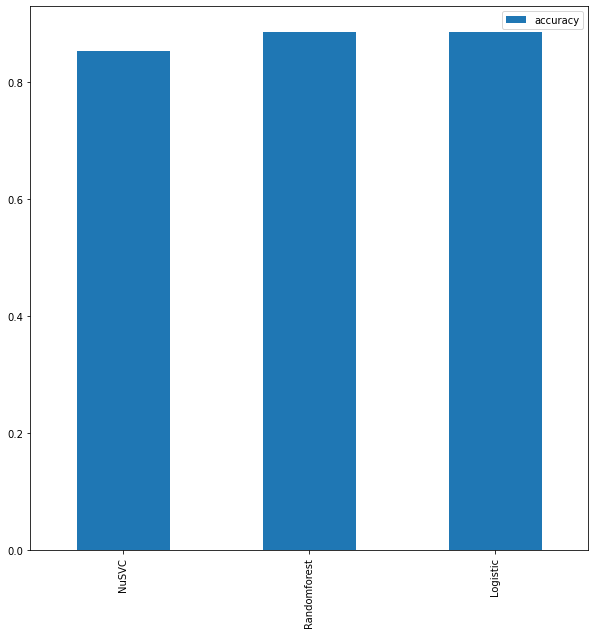

In [40]:
grid_tune = {'NuSVC':d,
            "Randomforest":e,
            "Logistic":f}
grid_tune_data = pd.DataFrame(grid_tune,index=["accuracy"])
grid_tune_data.T.plot.bar(figsize=(10,10));

In [41]:
y_preds_1 = NUSVC_grid_search.predict(x_test)
y_preds_2 = Randf_grid_search.predict(x_test)
y_preds_3 = logreg_grid_search.predict(x_test)

In [42]:
from sklearn.metrics import plot_roc_curve,plot_confusion_matrix,roc_curve,roc_auc_score

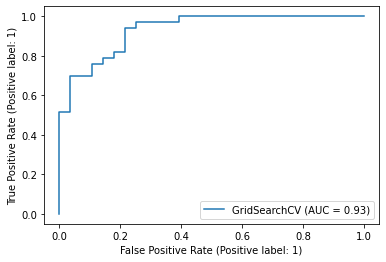

In [43]:
#for NuSVC
plot_roc_curve(NUSVC_grid_search,x_test,y_test);

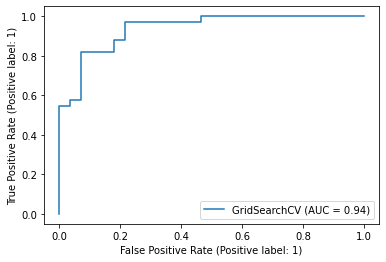

In [44]:
#for RandomForestClassifier
plot_roc_curve(Randf_grid_search,x_test,y_test);

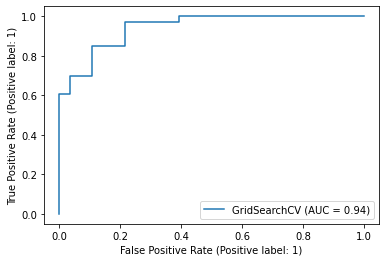

In [45]:
#for LogisticRegression
plot_roc_curve(logreg_grid_search,x_test,y_test);

# Confusion Matrix

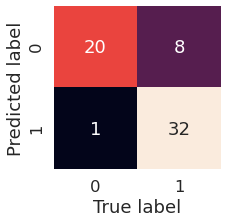

In [56]:

sns.set(font_scale=1.5)
def confus_matrix(y_test,y_preds):
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

confus_matrix(y_test,y_preds_1)

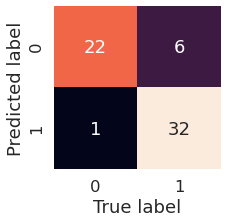

In [57]:
#RandomForest 
confus_matrix(y_test,y_preds_2)

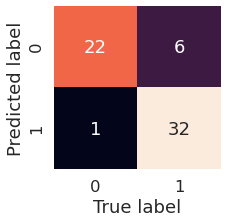

In [59]:
#logistic Regression
confus_matrix(y_test,y_preds_3)

In [60]:
#we can see that NuSVC has more False Negatives than randomforest and logistic regression but at false positives all have got one wrong

# Printing classification reports of models

In [62]:
from sklearn.metrics import classification_report

In [64]:
#NuSVC
print(classification_report(y_test,y_preds_1))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85        61
   macro avg       0.88      0.84      0.85        61
weighted avg       0.87      0.85      0.85        61



In [65]:
#RandomForest
print(classification_report(y_test,y_preds_2))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [68]:
#logistic Regression
print(classification_report(y_test,y_preds_3))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# Cross validation

In [72]:
#Nusvm
#NUSVC_grid_search
#Randf_grid_search
#logreg_grid_search
NUSVC_grid_search.best_params_
clf_1 = NuSVC(gamma='scale',
                kernel='linear')


In [76]:
clf_1_acc = cross_val_score(clf_1,x,y,cv=5,scoring="accuracy")
clf_1_acc = np.mean(clf_1_acc)
clf_1_acc

0.8279781420765028

In [79]:
clf_1_pre = cross_val_score(clf_1,x,y,cv=5,scoring="precision")
clf_1_pre = np.mean(clf_1_pre)
clf_1_pre

0.7996353496353497

In [80]:
clf_1_rec = cross_val_score(clf_1,x,y,cv=5,scoring="recall")
clf_1_rec = np.mean(clf_1_rec)
clf_1_rec

0.9151515151515153

In [82]:
clf_1_f1 = cross_val_score(clf_1,x,y,cv=5,scoring="f1")
clf_1_f1 = np.mean(clf_1_f1)
clf_1_f1

0.8528530020703935

In [89]:
#RandomForest
Randf_grid_search.best_params_
clf_2 = RandomForestClassifier(max_depth= 5,
 min_samples_leaf= 6,
 min_samples_split= 7,
 n_estimators= 60)

In [91]:
clf_2_acc = cross_val_score(clf_2,x,y,cv=5,scoring="accuracy")
clf_2_acc = np.mean(clf_2_acc)
clf_2_acc

0.828360655737705

In [94]:
clf_2_pre = cross_val_score(clf_2,x,y,cv=5,scoring="precision")
clf_2_pre = np.mean(clf_2_pre)
clf_2_pre

0.8228342245989305

In [95]:
clf_2_rec = cross_val_score(clf_2,x,y,cv=5,scoring="recall")
clf_2_rec = np.mean(clf_2_rec)
clf_2_rec


0.8969696969696971

In [97]:
clf_2_f1 = cross_val_score(clf_2,x,y,cv=5,scoring="f1")
clf_2_f1 = np.mean(clf_2_f1)
clf_2_f1

0.8543916281200467

In [100]:
#LogisticRegression
logreg_grid_search.best_params_
clf_3 = LogisticRegression(C= 0.23357214690901212, solver = 'liblinear')

In [105]:
clf_3_acc = cross_val_score(clf_3,x,y,cv=5,scoring="accuracy")
clf_3_acc = np.mean(clf_3_acc)
clf_3_acc

0.8479781420765027

In [106]:
clf_3_pre = cross_val_score(clf_3,x,y,cv=5,scoring="precision")
clf_3_pre = np.mean(clf_3_pre)
clf_3_pre

0.8215873015873015

In [107]:
clf_3_rec = cross_val_score(clf_3,x,y,cv=5,scoring="recall")
clf_3_rec = np.mean(clf_3_rec)
clf_3_rec

0.9272727272727274

In [109]:
clf_3_f1 = cross_val_score(clf_3,x,y,cv=5,scoring="f1")
clf_3_f1 = np.mean(clf_3_f1)
clf_3_f1

0.8705403543192143

In [123]:
clf_1_cross_val = pd.DataFrame({"Accuracy":clf_1_acc,
                               "Precision":clf_1_pre,
                               "recall":clf_1_rec,
                               "f1":clf_1_f1},index=[0])
clf_2_cross_val = pd.DataFrame({"Accuracy":clf_2_acc,
                               "Precision":clf_2_pre,
                               "recall":clf_2_rec,
                               "f1":clf_2_f1},index=[0])
clf_3_cross_val = pd.DataFrame({"Accuracy":clf_3_acc,
                               "Precision":clf_3_pre,
                               "recall":clf_3_rec,
                               "f1":clf_3_f1},index=[0])


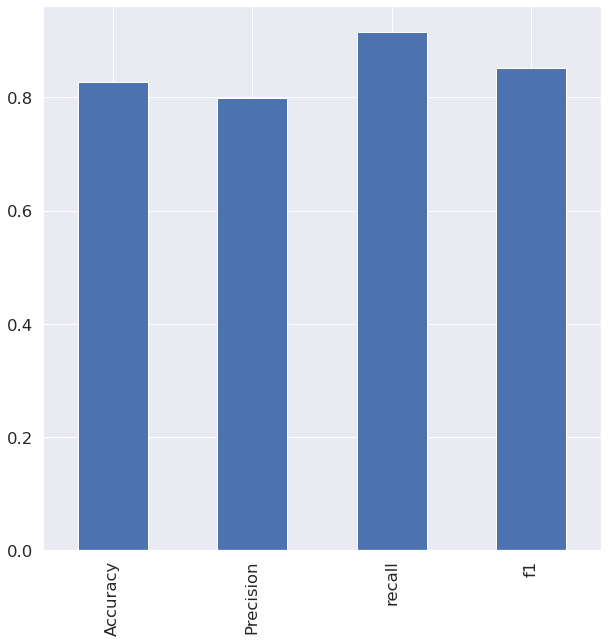

In [120]:
clf_1_cross_val.T.plot.bar(figsize=(10,10),legend=False);

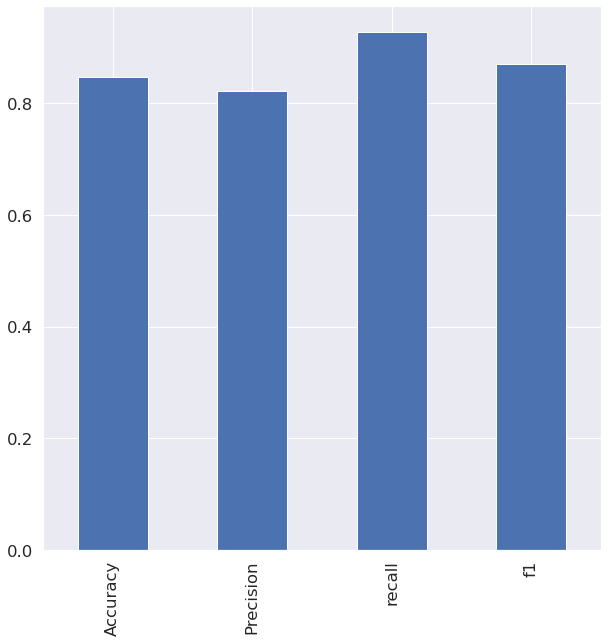

In [121]:
clf_2_cross_val.T.plot.bar(figsize=(10,10),legend=False);

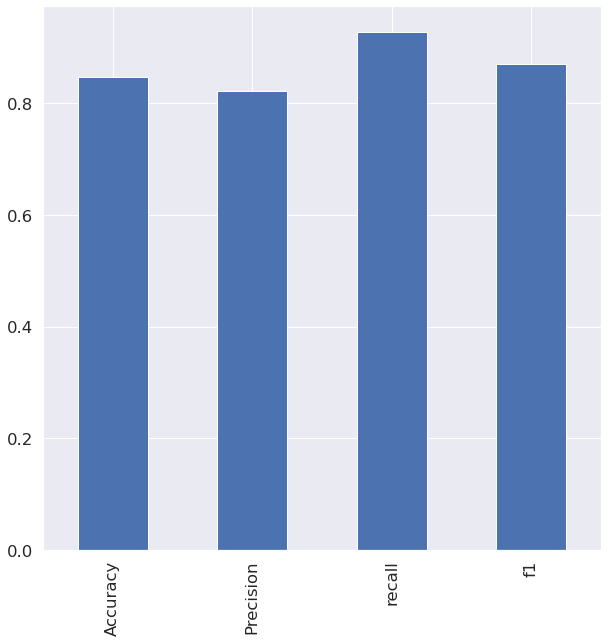

In [125]:
clf_3_cross_val.T.plot.bar(figsize=(10,10),legend=False);

# feature importances of the three models

In [128]:
#NuSVC
clf_1.fit(x_train,y_train)

NuSVC(kernel='linear')

In [132]:
clf_1.coef_
nusvc_feature_dict = dict(zip(heart_disease.columns,list(clf_1.coef_[0])))
nusvc_feature_dict

{'age': 0.0009379686772750251,
 'sex': -0.2983156243372773,
 'cp': 0.4741835714544175,
 'trestbps': -0.009925143273438852,
 'chol': -0.0007853294184458903,
 'fbs': -0.012677214880144852,
 'restecg': 0.11610495981536142,
 'thalach': 0.015319378271130724,
 'exang': -0.32870200987620524,
 'oldpeak': -0.23953408596277107,
 'slope': 0.13180076470346835,
 'ca': -0.4033118038946105,
 'thal': -0.32893089813867576}

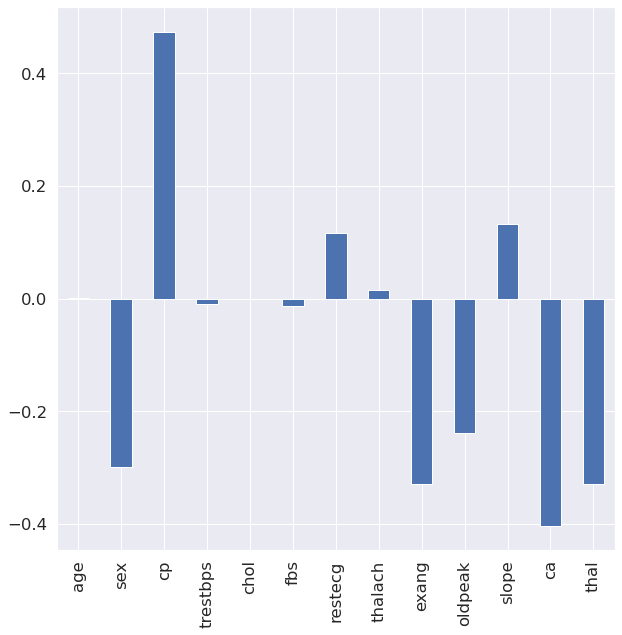

In [136]:
visual_features_nusvc = pd.DataFrame(nusvc_feature_dict,index=[0])
visual_features_nusvc.T.plot.bar(figsize = (10,10),legend=False);

In [151]:
#randomforest
clf_2.feature_importances_

array([0.07139384, 0.02780978, 0.20771651, 0.04217379, 0.03746021,
       0.00182878, 0.00986466, 0.12513231, 0.06875077, 0.11435052,
       0.04459577, 0.12424602, 0.12467705])

Feature: 0, Score: 0.07118
Feature: 1, Score: 0.02604
Feature: 2, Score: 0.23673
Feature: 3, Score: 0.03454
Feature: 4, Score: 0.03544
Feature: 5, Score: 0.00140
Feature: 6, Score: 0.00944
Feature: 7, Score: 0.10368
Feature: 8, Score: 0.06385
Feature: 9, Score: 0.12111
Feature: 10, Score: 0.03762
Feature: 11, Score: 0.15565
Feature: 12, Score: 0.10331


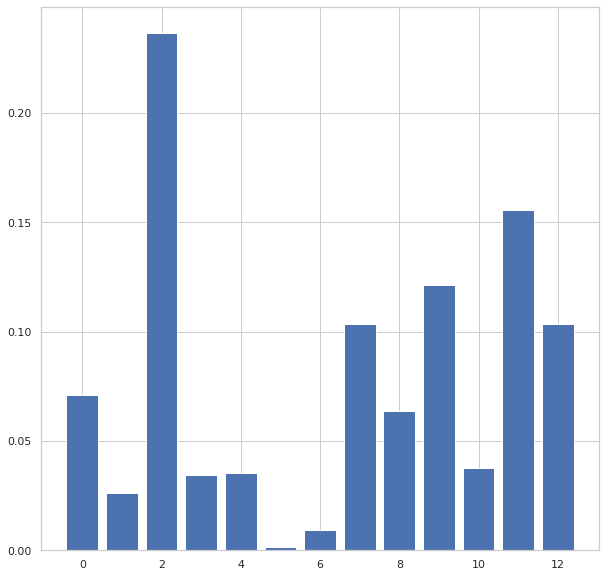

In [152]:
clf_2.fit(x_train,y_train)
clf_2.feature_importances_
importance = clf_2.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
    
fig,ax = plt.subplots(figsize=(10,10))
ax = ax.bar([x for x in range(len(importance))], importance)

In [154]:
#LogisticRegression
clf_3.fit(x_train,y_train)
clf_3.coef_

array([[ 0.00763667, -0.71024698,  0.7129698 , -0.02032843, -0.00141199,
        -0.0344377 ,  0.35957966,  0.02731576, -0.62285876, -0.43226317,
         0.3425029 , -0.6598191 , -0.50059834]])

In [156]:
logistic_feature_dict = dict(zip(heart_disease.columns,list(clf_3.coef_[0])))
logistic_feature_dict

{'age': 0.007636668187492772,
 'sex': -0.7102469829872642,
 'cp': 0.7129697954702677,
 'trestbps': -0.02032842825070029,
 'chol': -0.0014119899888642444,
 'fbs': -0.03443770474069875,
 'restecg': 0.3595796602162117,
 'thalach': 0.027315755976856718,
 'exang': -0.6228587623879287,
 'oldpeak': -0.4322631653947438,
 'slope': 0.34250290291579216,
 'ca': -0.6598190999557134,
 'thal': -0.5005983402207499}

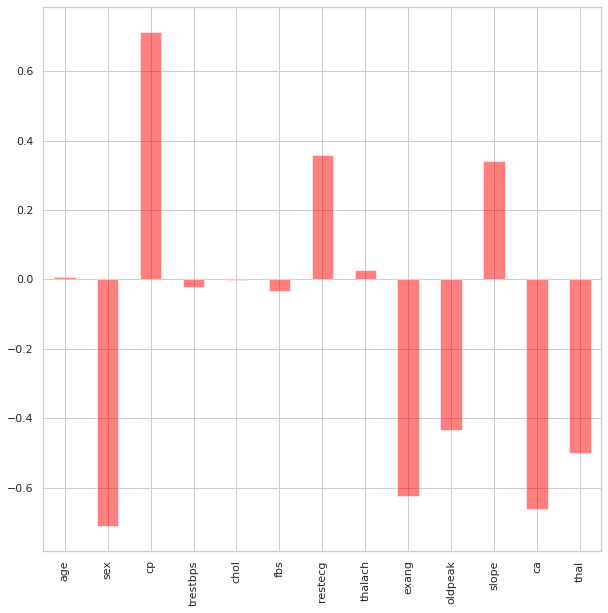

In [158]:
visual_features_logistic = pd.DataFrame(logistic_feature_dict,index=[0])
visual_features_logistic.T.plot.bar(figsize = (10,10),legend=False,color = 'red', alpha = 0.5);